## MNIST Classification using PyTorch
Implement a CNN model in PyTorch to classify MNIST dataset, you can use sklearn library to import the mnist dataset.

In [1]:
# Import all required libraries
import torch
import torch.nn as nn
import torch.nn.functional as func
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dt
import matplotlib.pyplot as plt
import numpy as np
import os
curr_dir = os.getcwd()

In [2]:
# Start by scratch :)
#importing datasets
t = transforms.ToTensor()
train = dt.MNIST(curr_dir , train = True , transform = t , download = True )
test = dt.MNIST(curr_dir , train = False , transform = t , download = True)

100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:02<00:00, 3962575.56it/s]


Extracting C:\Users\CHANDRAKANT\OneDrive\Desktop\WiDS-Into-the-RLverse\Week1\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\CHANDRAKANT\OneDrive\Desktop\WiDS-Into-the-RLverse\Week1\MNIST\raw



100%|███████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 3603513.02it/s]


Extracting C:\Users\CHANDRAKANT\OneDrive\Desktop\WiDS-Into-the-RLverse\Week1\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\CHANDRAKANT\OneDrive\Desktop\WiDS-Into-the-RLverse\Week1\MNIST\raw



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 1932349.22it/s]


Extracting C:\Users\CHANDRAKANT\OneDrive\Desktop\WiDS-Into-the-RLverse\Week1\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\CHANDRAKANT\OneDrive\Desktop\WiDS-Into-the-RLverse\Week1\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting C:\Users\CHANDRAKANT\OneDrive\Desktop\WiDS-Into-the-RLverse\Week1\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\CHANDRAKANT\OneDrive\Desktop\WiDS-Into-the-RLverse\Week1\MNIST\raw



In [3]:
#size of train and test data
print(len(train))
print(len(test))

60000
10000


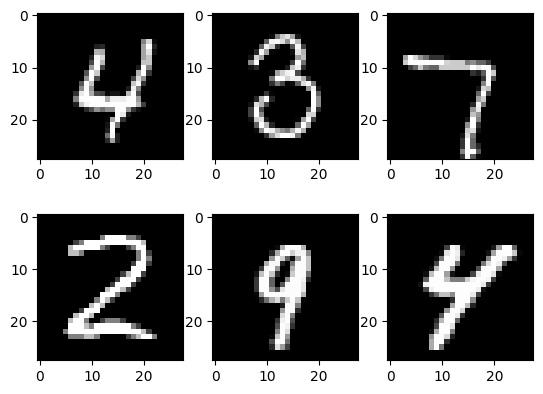

In [4]:
#sample outputs
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset = train , batch_size = 64 , shuffle = True)
test_loader = DataLoader(dataset = test , batch_size = 64 , shuffle = False)

ex = iter(train_loader)
samples , label = next(ex)

for i in range(6):
    plt.subplot(2 ,3,i+1)
    plt.imshow(samples[i][0] , cmap = "gray")
plt.show()

In [5]:
#hyper-parameters
num_epochs = 2
batch_size = 100
learning_rate = 0.01

#making the cnn architecture
class  ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1 , 3 , 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(3 , 6 , 5)
        self.fc1 = nn.Linear(6*4*4 , 50)
        self.fc2 = nn.Linear(50 , 30)
        self.fc3 = nn.Linear(30 , 10)
    def forward(self , x):
        x = self.pool(func.relu(self.conv1(x)))
        x = self.pool(func.relu(self.conv2(x)))
        x = x.view(-1 , 6*4*4)
        x = func.relu(self.fc1(x))
        x = func.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = learning_rate)
n_iters = len(train_loader)

for epoch in range(num_epochs):
    for i , (img , lab) in enumerate(train_loader):
        output = model(img)
        loss = criterion(output , lab)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (i+1)%100 == 0 :
            print(f'epoch {epoch+1}/{num_epochs} , step {i+1}/{n_iters} , loss = {loss.item():.4f}')
            
with torch.no_grad():
    n_correct = 0
    n_samples = 0
        
    for i , (img , lab) in enumerate(test_loader):
        output = model(img)
        _, predictions = torch.max(output , 1)
        n_samples += lab.shape[0]
        n_correct += (predictions == lab).sum().item()
        

acc = 100.0 * n_correct / n_samples
print(f'accuracy = {acc}')       
        

epoch 1/2 , step 100/938 , loss = 0.4011
epoch 1/2 , step 200/938 , loss = 0.2027
epoch 1/2 , step 300/938 , loss = 0.1649
epoch 1/2 , step 400/938 , loss = 0.1214
epoch 1/2 , step 500/938 , loss = 0.0649
epoch 1/2 , step 600/938 , loss = 0.0277
epoch 1/2 , step 700/938 , loss = 0.1903
epoch 1/2 , step 800/938 , loss = 0.0826
epoch 1/2 , step 900/938 , loss = 0.1045
epoch 2/2 , step 100/938 , loss = 0.1825
epoch 2/2 , step 200/938 , loss = 0.1536
epoch 2/2 , step 300/938 , loss = 0.1077
epoch 2/2 , step 400/938 , loss = 0.0649
epoch 2/2 , step 500/938 , loss = 0.0841
epoch 2/2 , step 600/938 , loss = 0.0499
epoch 2/2 , step 700/938 , loss = 0.1445
epoch 2/2 , step 800/938 , loss = 0.0927
epoch 2/2 , step 900/938 , loss = 0.0406
accuracy = 96.57


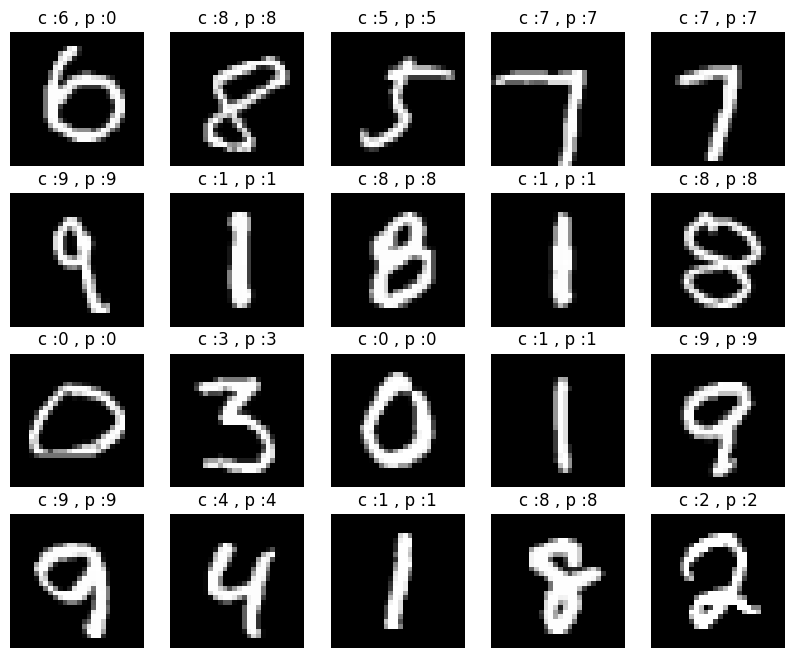

In [7]:
no_img = 20
fig , axes = plt.subplots( 4 , 5 , figsize = (10,8))
k = 259
for i in range(k , k+no_img):
    img , label = test[i]
    
    labels = label
    output = model(img)
    _, predictions = torch.max(output , 1)
    
    row = (i-k)//5
    col = (i-k)%5
    axes[row , col].imshow(img[0] , cmap = "gray")
    axes[row , col].set_title(f"c :{label} , p :{predictions.item()}")
    axes[row , col].axis('off')

plt.show()